In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import re

## Carregando os dados

### Carregando e visualizando dados

In [2]:
# Lendo os dados
open_masc = pd.read_csv('data/men_main_21.1.csv', sep=',', low_memory=False)

In [3]:
# Primeira visualização do Dataframe
open_masc.head(10)

,id,first_name,lastname,placing,country,continent,age,affiliate,height,weight,points,21.1,21.1 time,21.2,21.2 time,21.3,21.3 time,21.4,weight lifted
0,0,JEFFRE,ADLER,1,Canada,North America,27,CrossFit Wonderland,69 in,197 lb,101,20th (11:55),605,8th (9:14),225,27th (8:15),180,46th (317 lbs),317
1,1,SCOTT,PANCHIK,2,United States,North America,33,CrossFit Mentality,69 in,187 lb,141,33rd (12:25),605,47th (9:52),225,5th (7:48),180,56th (316 lbs),316
2,2,TRAVIS,MEAD,3,United States,North America,34,Iron Valley CrossFit,73 in,205 lb,165,87th (13:02),605,24th (9:38),225,48th (8:26),180,6th (345 lbs),345
3,3,SAXON,PANCHIK,4,United States,North America,25,CrossFit Cliffside,69 in,180 lb,217,5th (11:25),605,68th (9:59),225,87th (8:41),180,57th (316 lbs),316
4,4,RICHARD,FRONING JR.,5,United States,North America,33,CrossFit Mayhem,69 in,194 lb,254,58th (12:45),605,91st (10:04),225,5th (7:48),180,100th (312 lbs),312
5,5,NOAH,OHLSEN,6,United States,North America,30,Peak 360 CrossFit,67 in,190 lb,272,11th (11:41),605,21st (9:33),225,2nd (7:44),180,238th (301 lbs),301
6,6,SAMUEL,COURNOYER,7,Canada,North America,25,CrossFit Mayhem,180 cm,205 lb,276,158th (13:27),605,79th (10:02),225,20th (8:09),180,19th (328 lbs),328
7,7,COLE,GREASHABER,8,United States,North America,21,CrossFit Lee's Summit (LS),72 in,206 lb,403,82nd (13:01),605,68th (9:59),225,46th (8:25),180,207th (303 lbs),303
8,8,AGUSTIN,RICHELME,9,Argentina,South America,24,NaN,173 cm,83 kg,417,30th (12:19),605,137th (10:15),225,1st (7:40),180,249th (300 lbs),300
9,9,OLEG,LASCENKO,10,United Kingdom,Europe,23,CrossFit Abu Dhabi,175 cm,92 kg,428,53rd (12:43),605,22nd (9:34),225,102nd (8:46),180,251st (300 lbs),300


In [4]:
# Verificando o "tamanho" do df
open_masc.shape

(137464, 19)

In [5]:
open_masc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137464 entries, 0 to 137463
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             137464 non-null  int64 
 1   first_name     137463 non-null  object
 2   lastname       137456 non-null  object
 3   placing        137464 non-null  object
 4   country        137464 non-null  object
 5   continent      137464 non-null  object
 6   age            137464 non-null  object
 7   affiliate      112681 non-null  object
 8   height         87195 non-null   object
 9    weight        119239 non-null  object
 10  points         137464 non-null  object
 11  21.1           103062 non-null  object
 12  21.1 time      43026 non-null   object
 13  21.2           106708 non-null  object
 14  21.2 time      96154 non-null   object
 15  21.3           101174 non-null  object
 16  21.3 time      51893 non-null   object
 17  21.4           117637 non-null  object
 18  weig

In [6]:
# Verificando quais são as colunas originais do df
open_masc.columns

Index(['id', 'first_name', 'lastname', 'placing', 'country', 'continent',
       'age', 'affiliate', 'height ', ' weight', 'points', '21.1', '21.1 time',
       '21.2', '21.2 time', '21.3', '21.3 time', '21.4', 'weight lifted'],
      dtype='object')

In [7]:
open_masc.isnull().sum()

id                   0
first_name           1
lastname             8
placing              0
country              0
continent            0
age                  0
affiliate        24783
height           50269
 weight          18225
points               0
21.1             34402
21.1 time        94438
21.2             30756
21.2 time        41310
21.3             36290
21.3 time        85571
21.4             19827
weight lifted    55263
dtype: int64

In [8]:
# Primeira descrição dos dados numéricos, 
# verifica-se que algumas colunas de valores estão em string e 
# precisam ser convertidos para possibilitar que os calculos sejam feitos
open_masc.describe()

,id
count,137464.000000
mean,68731.500000
std,39682.583039
min,0.000000
25%,34365.750000
50%,68731.500000
75%,103097.250000
max,137463.000000


In [9]:
# Visualizando todos os países listados
# Verificou-se a necessidade de remover uma linha com dados inconsistentes
country = np.array(open_masc['country'])
unique_country = np.unique(country)
print(unique_country)

['57646' 'Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Chile' 'China'
 'Colombia' 'Congo, The Democratic Republic of the' 'Costa Rica' 'Croatia'
 'Cyprus' 'Czech Republic' "Côte d'Ivoire" 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Korea, Republic of' 'Kosovo'
 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon' 'Libya' 'Liechtenstein'
 'Lithuania' 'Luxembourg' 'Macedonia' 'Madagascar' 'Malawi' 'Malaysia'
 'Mald

In [10]:
# Conferindo os continentes listados, 
# verificou-se a necessidade de remover dados inconsistentes
continent = np.array(open_masc['continent'])
unique_continent = np.unique(continent)
print(unique_continent)

['Africa' 'Asia' 'Europe' 'North America' 'Oceania' 'South America'
 'United Kingdom']


### Limpeza os dados

#### Seleção de colunas

In [11]:
# Novo Dataframe apenas com as colunas que serão analisadas
df_masc = open_masc[['first_name', 'lastname', 'country', 
'continent', 'age', 'affiliate', 'points', 'weight lifted']]
df_masc.head(10)

,first_name,lastname,country,continent,age,affiliate,points,weight lifted
0,JEFFRE,ADLER,Canada,North America,27,CrossFit Wonderland,101,317
1,SCOTT,PANCHIK,United States,North America,33,CrossFit Mentality,141,316
2,TRAVIS,MEAD,United States,North America,34,Iron Valley CrossFit,165,345
3,SAXON,PANCHIK,United States,North America,25,CrossFit Cliffside,217,316
4,RICHARD,FRONING JR.,United States,North America,33,CrossFit Mayhem,254,312
5,NOAH,OHLSEN,United States,North America,30,Peak 360 CrossFit,272,301
6,SAMUEL,COURNOYER,Canada,North America,25,CrossFit Mayhem,276,328
7,COLE,GREASHABER,United States,North America,21,CrossFit Lee's Summit (LS),403,303
8,AGUSTIN,RICHELME,Argentina,South America,24,NaN,417,300
9,OLEG,LASCENKO,United Kingdom,Europe,23,CrossFit Abu Dhabi,428,300


#### Países e continentes

In [12]:
# removendo inconsistencias de paises e continentes
filtro1 = df_masc['country'] != '57646'
df_masc = df_masc[filtro1]

#### Idades

In [13]:
# Convertendo a coluna age (idade) de 'string' para numérico
df_masc['age'] = pd.to_numeric(df_masc['age'])
df_masc.head(10)

,first_name,lastname,country,continent,age,affiliate,points,weight lifted
0,JEFFRE,ADLER,Canada,North America,27,CrossFit Wonderland,101,317
1,SCOTT,PANCHIK,United States,North America,33,CrossFit Mentality,141,316
2,TRAVIS,MEAD,United States,North America,34,Iron Valley CrossFit,165,345
3,SAXON,PANCHIK,United States,North America,25,CrossFit Cliffside,217,316
4,RICHARD,FRONING JR.,United States,North America,33,CrossFit Mayhem,254,312
5,NOAH,OHLSEN,United States,North America,30,Peak 360 CrossFit,272,301
6,SAMUEL,COURNOYER,Canada,North America,25,CrossFit Mayhem,276,328
7,COLE,GREASHABER,United States,North America,21,CrossFit Lee's Summit (LS),403,303
8,AGUSTIN,RICHELME,Argentina,South America,24,NaN,417,300
9,OLEG,LASCENKO,United Kingdom,Europe,23,CrossFit Abu Dhabi,428,300


#### peso levantado

In [14]:
# Preenchendo pesos nullos com valor zero
df_masc['weight lifted'] = df_masc['weight lifted'].fillna('0')
df_masc.head(10)

,first_name,lastname,country,continent,age,affiliate,points,weight lifted
0,JEFFRE,ADLER,Canada,North America,27,CrossFit Wonderland,101,317
1,SCOTT,PANCHIK,United States,North America,33,CrossFit Mentality,141,316
2,TRAVIS,MEAD,United States,North America,34,Iron Valley CrossFit,165,345
3,SAXON,PANCHIK,United States,North America,25,CrossFit Cliffside,217,316
4,RICHARD,FRONING JR.,United States,North America,33,CrossFit Mayhem,254,312
5,NOAH,OHLSEN,United States,North America,30,Peak 360 CrossFit,272,301
6,SAMUEL,COURNOYER,Canada,North America,25,CrossFit Mayhem,276,328
7,COLE,GREASHABER,United States,North America,21,CrossFit Lee's Summit (LS),403,303
8,AGUSTIN,RICHELME,Argentina,South America,24,NaN,417,300
9,OLEG,LASCENKO,United Kingdom,Europe,23,CrossFit Abu Dhabi,428,300


In [15]:
# Iniciando o processo para converter weight_lift para numerico
# Função para remover a string 'lbs' e converter peso para quilos
def substitui_lbs(value):
    x = value.replace(' lbs', '')
    x = float(x) / 2.205
    return(x)

In [16]:
# Função para remover a string 'kg'
def substitui_kg(value):
    x = value.replace(' kg', '')
    return(x)

In [17]:
df_masc['weight lifted'] = df_masc['weight lifted'].apply(substitui_kg)


In [18]:
#Funaçao para substituir valores inválidos por peso zero
def remove_peso_invalido(value):
    if ('(--)' in value):
        value = '0'
    return value

In [19]:
df_masc['weight lifted'] = df_masc['weight lifted'].apply(remove_peso_invalido)

In [20]:
df_masc['weight lifted'] = df_masc['weight lifted'].apply(substitui_lbs)


In [21]:
# Convertendo a coluna weight lifted de 'string' para numérico
df_masc['weight lifted'] = pd.to_numeric(df_masc['weight lifted'])

In [22]:
df_masc['weight lifted']

0         143.764172
1         143.310658
2         156.462585
3         143.310658
4         141.496599
             ...    
137459      0.000000
137460      0.000000
137461      0.000000
137462      0.000000
137463      0.000000
Name: weight lifted, Length: 137463, dtype: float64

#### pontos

In [23]:
df_masc.head(5)

,first_name,lastname,country,continent,age,affiliate,points,weight lifted
0,JEFFRE,ADLER,Canada,North America,27,CrossFit Wonderland,101,143.764172
1,SCOTT,PANCHIK,United States,North America,33,CrossFit Mentality,141,143.310658
2,TRAVIS,MEAD,United States,North America,34,Iron Valley CrossFit,165,156.462585
3,SAXON,PANCHIK,United States,North America,25,CrossFit Cliffside,217,143.310658
4,RICHARD,FRONING JR.,United States,North America,33,CrossFit Mayhem,254,141.496599


In [24]:
df_masc['points']

0                   101
1                   141
2                   165
3                   217
4                   254
              ...      
137459    117347th (--)
137460    117347th (--)
137461    117347th (--)
137462          467.118
137463    117347th (--)
Name: points, Length: 137463, dtype: object

In [25]:
# Inicio do processo para converter points para numérico
def remove_pontos_invalidos(value):
    if ('lb' in value):
        x = "0"
    elif ('kg' in value):
        x = '0'
    elif ('t' in value):
        x = '0'
    elif ('d' in value):
        x = '0'
    else:
        x = value
    return x

In [26]:
df_masc.head(2)

,first_name,lastname,country,continent,age,affiliate,points,weight lifted
0,JEFFRE,ADLER,Canada,North America,27,CrossFit Wonderland,101,143.764172
1,SCOTT,PANCHIK,United States,North America,33,CrossFit Mentality,141,143.310658


In [27]:
df_masc['points'] = df_masc['points'].apply(remove_pontos_invalidos)
# df_masc['points']

In [28]:
# Convertendo a coluna points lifted de 'string' para numérico
df_masc['points'] = pd.to_numeric(df_masc['points'])
df_masc['points']

0         101.000
1         141.000
2         165.000
3         217.000
4         254.000
           ...   
137459      0.000
137460      0.000
137461      0.000
137462    467.118
137463      0.000
Name: points, Length: 137463, dtype: float64

In [29]:
df_masc['points'] = df_masc['points'].astype(float)
df_masc['points']

0         101.000
1         141.000
2         165.000
3         217.000
4         254.000
           ...   
137459      0.000
137460      0.000
137461      0.000
137462    467.118
137463      0.000
Name: points, Length: 137463, dtype: float64

In [30]:
df_masc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137463 entries, 0 to 137463
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   first_name     137462 non-null  object 
 1   lastname       137456 non-null  object 
 2   country        137463 non-null  object 
 3   continent      137463 non-null  object 
 4   age            137463 non-null  int64  
 5   affiliate      112680 non-null  object 
 6   points         137463 non-null  float64
 7   weight lifted  137463 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 9.4+ MB


#### Removendo linhas nulas

In [31]:
df_masc.isna().sum()

first_name           1
lastname             7
country              0
continent            0
age                  0
affiliate        24783
points               0
weight lifted        0
dtype: int64

In [32]:
# Encontrando quem tem first_name nulo
df_masc[pd.isna(df_masc['first_name'])]

,first_name,lastname,country,continent,age,affiliate,points,weight lifted
93138,NaN,YEONGDON,"Korea, Republic of",Asia,28,CrossFit 660,0.0,0.0


In [33]:
# Encontrando quem tem lastname nulo
df_masc[pd.isna(df_masc['lastname'])]

,first_name,lastname,country,continent,age,affiliate,points,weight lifted
2040,HYEONJONG,NaN,"Korea, Republic of",Asia,31,CrossFit Zest,17.676,114.285714
7732,YOUNGSEON,NaN,"Korea, Republic of",Asia,23,Golden Crown CrossFit Seodaemun,48.734,97.505669
19017,TAKSEOK,NaN,"Korea, Republic of",Asia,41,CrossFit Geumchon,96.625,97.505669
73598,MICHAEL,NaN,Canada,North America,51,CrossFit Calgary,0.000,0.000000
81080,JONGMYUNG,NaN,"Korea, Republic of",Asia,28,CrossFit Lagom,0.000,0.000000
86324,DAVID,NaN,United States,North America,37,CrossFit East Oahu,333.850,66.666667
133060,BRIAN,NaN,United States,North America,33,NaN,459.276,0.000000


In [34]:
# Incluindo texto nos campos nulos de acordo com a coluna
values = {'lastname': '-', 'first_name': '-', 'affiliate': 'not_affiliate'}
df_masc.fillna(value = values, inplace=True) 

In [35]:
df_masc.isna().sum()
# Nenhum valor null

first_name       0
lastname         0
country          0
continent        0
age              0
affiliate        0
points           0
weight lifted    0
dtype: int64

## Análises

### Distribuição por país

In [36]:
# Quantos atletas há de cada país?
df_masc.country.value_counts()

United States     65145
Australia          8206
United Kingdom     6080
France             6038
Canada             5321
                  ...  
Dominica              1
Laos                  1
Somalia               1
Djibouti              1
Guinea                1
Name: country, Length: 156, dtype: int64

In [37]:
# Porcentagem de atletas de cada país
df_masc.country.value_counts(normalize=True)

United States     0.473909
Australia         0.059696
United Kingdom    0.044230
France            0.043925
Canada            0.038709
                    ...   
Dominica          0.000007
Laos              0.000007
Somalia           0.000007
Djibouti          0.000007
Guinea            0.000007
Name: country, Length: 156, dtype: float64

### Distribuição por continente

In [38]:
# Quantos atletas há de cada continente?
df_masc[['continent']].value_counts()

continent    
North America    73659
Europe           34317
Oceania           9930
Asia              8194
South America     7076
Africa            4287
dtype: int64

In [39]:
# Porcentagem de atletas por continente
df_masc[['continent']].value_counts(normalize=True)

continent    
North America    0.535846
Europe           0.249645
Oceania          0.072238
Asia             0.059609
South America    0.051476
Africa           0.031187
dtype: float64

### Distribuição de afiliados por continente 

In [40]:
affiliate_continent = df_masc.groupby('continent')['affiliate'].nunique()
affiliate_continent

continent
Africa            392
Asia              931
Europe           3735
North America    5585
Oceania           715
South America     932
Name: affiliate, dtype: int64

### Distribuição de afiliados por país

In [41]:
affiliate_country = df_masc.groupby('country')['affiliate'].nunique()
affiliate_country

country
Afghanistan      3
Albania          6
Algeria         17
Andorra          7
Angola          13
              ... 
Venezuela      136
Viet Nam        12
Yemen            4
Zambia           5
Zimbabwe        19
Name: affiliate, Length: 156, dtype: int64

### Distribuição de atletas por idade

In [42]:
athletes_age = df_masc[['age']].value_counts()
athletes_age

age
31     6500
32     6420
30     6363
33     6278
29     6182
34     6035
35     5974
36     5675
28     5609
37     5368
38     5267
27     5132
39     4990
40     4820
26     4438
41     4351
42     3976
25     3847
43     3510
44     3260
24     3185
45     3015
46     2597
23     2568
47     2435
48     2239
49     2013
22     1974
50     1917
51     1656
21     1520
52     1376
20     1194
53     1136
17     1004
54     1002
18      889
16      887
19      861
dtype: int64

In [43]:
max_age = df_masc['age'].max()
max_age

54

In [44]:
min_age = df_masc['age'].min()
min_age

16

In [45]:
df_masc.head(10)

,first_name,lastname,country,continent,age,affiliate,points,weight lifted
0,JEFFRE,ADLER,Canada,North America,27,CrossFit Wonderland,101.0,143.764172
1,SCOTT,PANCHIK,United States,North America,33,CrossFit Mentality,141.0,143.310658
2,TRAVIS,MEAD,United States,North America,34,Iron Valley CrossFit,165.0,156.462585
3,SAXON,PANCHIK,United States,North America,25,CrossFit Cliffside,217.0,143.310658
4,RICHARD,FRONING JR.,United States,North America,33,CrossFit Mayhem,254.0,141.496599
5,NOAH,OHLSEN,United States,North America,30,Peak 360 CrossFit,272.0,136.507937
6,SAMUEL,COURNOYER,Canada,North America,25,CrossFit Mayhem,276.0,148.752834
7,COLE,GREASHABER,United States,North America,21,CrossFit Lee's Summit (LS),403.0,137.414966
8,AGUSTIN,RICHELME,Argentina,South America,24,not_affiliate,417.0,136.054422
9,OLEG,LASCENKO,United Kingdom,Europe,23,CrossFit Abu Dhabi,428.0,136.054422


### Distribuição de pontos por idade

In [46]:
# Separando faixas de idade
print("Menor idade: ", df_masc.age.min())
print("Maior idade: ", df_masc.age.max())

Menor idade:  16
Maior idade:  54


In [47]:
# Criando faixa etária
classes = [
    (df_masc['age']< 20),
    (df_masc['age']>= 20) & (df_masc['age']< 24),
    (df_masc['age']>= 24) & (df_masc['age']< 28),
    (df_masc['age']>= 28) & (df_masc['age']< 32),
    (df_masc['age']>= 32) & (df_masc['age']< 36),
    (df_masc['age']>= 40) & (df_masc['age']< 44),
    (df_masc['age']>= 44) & (df_masc['age']< 48),
    (df_masc['age']>= 48) & (df_masc['age']< 52),
    (df_masc['age']>= 52)
]

faixa_etaria = ['sub-20', '20-23', '24-27', '28-31', '32-35', '36-43', '44-47', '48-51', '52+']
df_masc['faixa_etaria'] = np.select(classes, faixa_etaria, default=np.nan)

In [48]:
df_masc.head()

,first_name,lastname,country,continent,age,affiliate,points,weight lifted,faixa_etaria
0,JEFFRE,ADLER,Canada,North America,27,CrossFit Wonderland,101.0,143.764172,24-27
1,SCOTT,PANCHIK,United States,North America,33,CrossFit Mentality,141.0,143.310658,32-35
2,TRAVIS,MEAD,United States,North America,34,Iron Valley CrossFit,165.0,156.462585,32-35
3,SAXON,PANCHIK,United States,North America,25,CrossFit Cliffside,217.0,143.310658,24-27
4,RICHARD,FRONING JR.,United States,North America,33,CrossFit Mayhem,254.0,141.496599,32-35


In [49]:
# Quantidade de atletas por faixa-etária
df_masc['faixa_etaria'].value_counts()

32-35     24707
28-31     24654
nan       21300
36-43     16657
24-27     16602
44-47     11307
48-51      7825
20-23      7256
sub-20     3641
52+        3514
Name: faixa_etaria, dtype: int64

In [50]:
import matplotlib.pyplot as plt 

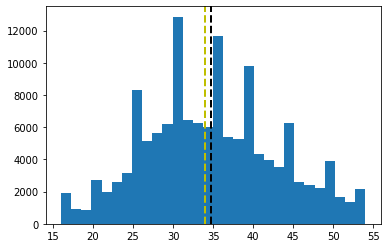

In [51]:
# Distribuição de atletas por idade
plt.hist(df_masc['age'], 30)
plt.axvline(df_masc['age'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(df_masc['age'].median(), color='y', linestyle='dashed', linewidth=2)
plt.show()

# Podemos verificar que na 

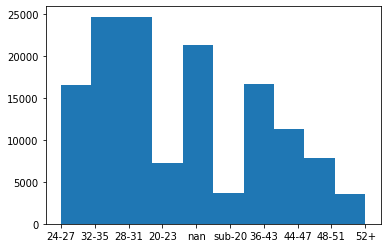

<Figure size 1440x720 with 0 Axes>

In [52]:
plt.hist(df_masc['faixa_etaria'])
# plt.axvline(df_masc['faixa_etaria'].mean(), color='k', linestyle='dashed', linewidth=2)
# plt.axvline(df_masc['faixa_etaria'].median(), color='y', linestyle='dashed', linewidth=2)
plt.figure(figsize=(20,10))
plt.show()

In [53]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})

Text(0.5, 1.0, 'Relação entre a idade e os pontos conquistados')

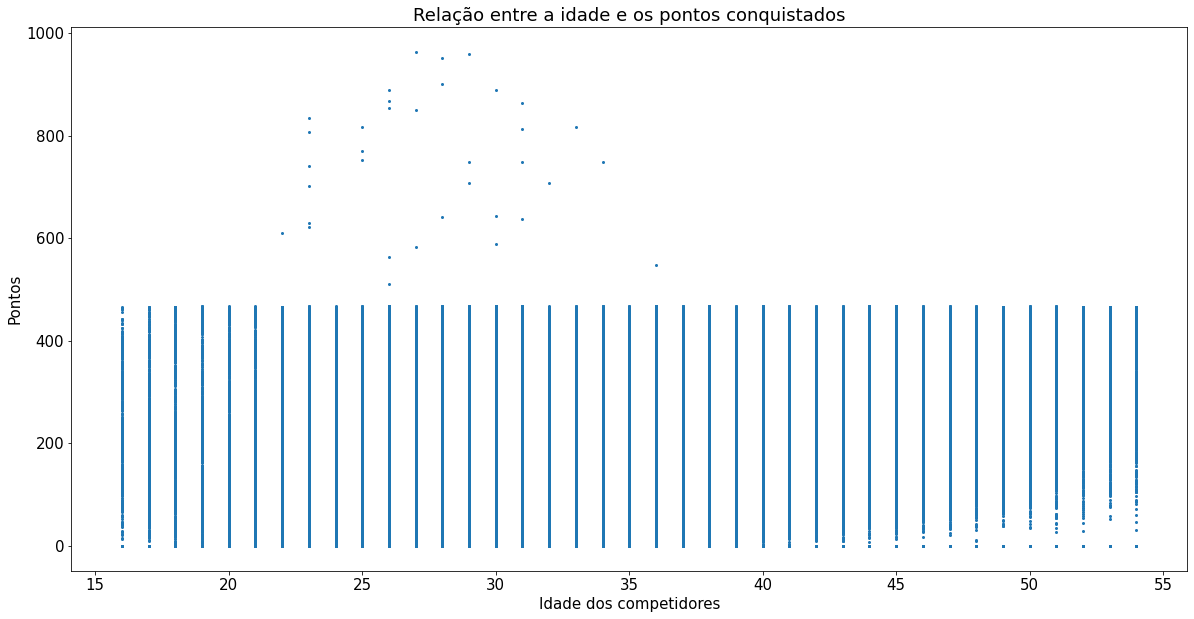

In [54]:
plt.figure(figsize=(20,10))
plt.scatter(df_masc['age'], df_masc['points'], s=4)
plt.xlabel("Idade dos competidores")
plt.ylabel("Pontos")
plt.title("Relação entre a idade e os pontos conquistados")

# Verificamos que há uma faixa de pontuação, acima de 500, que poucos atletas alcançaram
# Esses atletas são a "Elite" da modalidade e possuem ente 22 e 36 anos

#### Distribuiçao de carga levantada por idade

In [55]:
print(min(df_masc['weight lifted']))
print(max(df_masc['weight lifted']))

0.0
299.7732426303855


In [56]:
# Criando faixas de peso levantado
classes = [
    (df_masc['weight lifted']< 50),
    (df_masc['weight lifted']>= 50) & (df_masc['weight lifted']< 100),
    (df_masc['weight lifted']>= 100) & (df_masc['weight lifted']< 150),
    (df_masc['weight lifted']>= 150) & (df_masc['weight lifted']< 200),
    (df_masc['weight lifted']>= 200) & (df_masc['weight lifted']< 250),
    (df_masc['weight lifted']>= 250)
]

faixa_peso = ['<49', '50-100', '99-150', '149-200', '199-250', '>249']
df_masc['faixa_peso'] = np.select(classes, faixa_peso, default=np.nan)

Text(0.5, 1.0, 'Relação entre a idade e a carga levantada')

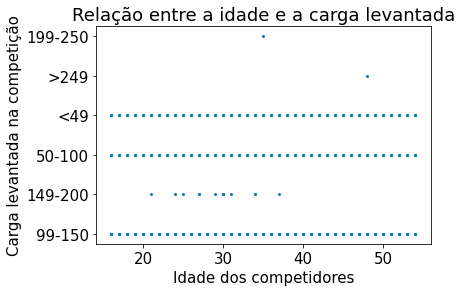

In [58]:
# plt.figure(figsize=(20,10))
plt.scatter(df_masc['age'], df_masc['faixa_peso'], s=4)
plt.xlabel("Idade dos competidores")
plt.ylabel("Carga levantada na competição")
plt.title("Relação entre a idade e a carga levantada")

Text(0.5, 1.0, 'Relação entre a idade e a carga levantada')

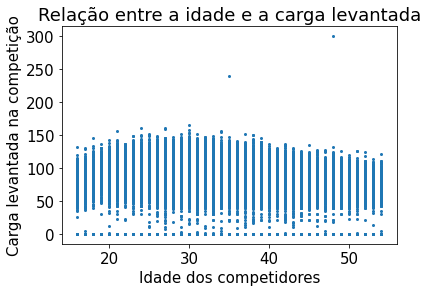

In [59]:
# plt.figure(figsize=(20,10))
plt.scatter(df_masc['age'], df_masc['weight lifted'], s=4)
plt.xlabel("Idade dos competidores")
plt.ylabel("Carga levantada na competição")
plt.title("Relação entre a idade e a carga levantada")